# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [5]:
# read the iris data into a pandas DataFrame, including column names
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Task 2

In [6]:
# gather basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Task 3

In [24]:
# use groupby to look for differences between the species
df.groupby('species').describe()
df2=df.groupby('species').describe()
df2.to_excel("iris_spec_describe.xlsx")

In [10]:
# use sorting to look for differences between the species
df.sort_values('species')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,virginica
120,6.9,3.2,5.7,2.3,virginica
121,5.6,2.8,4.9,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica


<Axes: xlabel='sepal_length', ylabel='petal_length'>

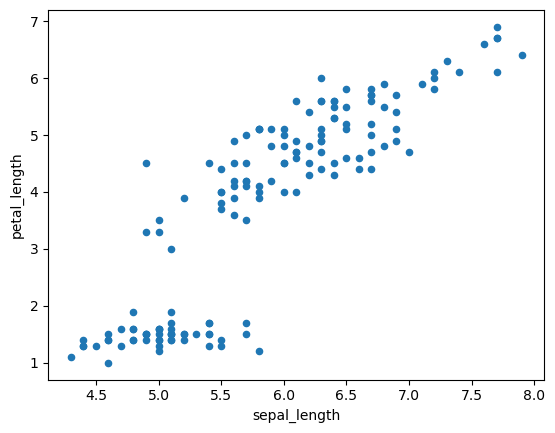

In [17]:
# use plotting to look for differences between the species,
df.plot(kind='scatter',x='sepal_length',y='petal_length')

<Axes: xlabel='petal_length', ylabel='petal_width'>

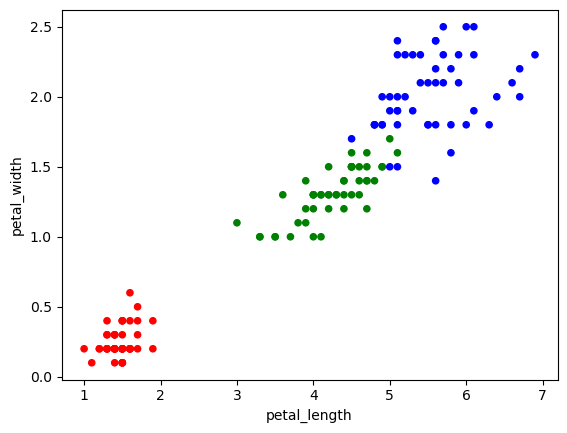

In [18]:
colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
df.plot.scatter(x='petal_length', y='petal_width', c=df['species'].apply(lambda x: colors[x]))

In [19]:
# map species to a numeric value so that plots can be colored by category
df['species_num'] = df.species.map({'setosa':0, 'versicolor':1, 'virginica':2})
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


## Task 4

In [28]:
#Come up with a set of rules that could be used to predict species based upon measurements.
sepal_length=5
sepal_width=3
petal_length=1.7
petal_width=0.5

if (4.3 <= sepal_length <= 5.8 and
    2.3 <= sepal_width <= 4.4 and
    1 <= petal_length <= 1.9 and
    0.1 <= petal_width <= 0.6):
        print("Iris-Setosa")
elif (4.9 <= sepal_length <= 7 and
    2 <= sepal_width <= 3.4 and
    3 <= petal_length <= 5.1 and
    1 <= petal_width <= 1.8):
        print("Iris-Versicolor")
elif  (4.9 <= sepal_length <= 7.9 and
    2.2 <= sepal_width <= 3.8 and
    4.5 <= petal_length <= 6.9 and
    1.4 <= petal_width <= 2.5):
        print("Iris-Virginica")
else:
    print("Undefined")

Iris-Setosa


## Bonus

In [37]:
# define function that accepts a row of data and returns a predicted species
def classify_flower(list_measurements):
    '''
    This function takes in a list of values and
    [sepal_length, sepal_width, petal_length, petal_width]
    returns the predicted species.
    0 = Iris-Setosa
    1 = Iris-Versicolor
    2 = Iris-Virginica
    3 = Undefined
    '''
    if (4.3 <= list_measurements[0] <= 5.8 and
        2.3 <= list_measurements[1] <= 4.4 and
        1 <= list_measurements[2] <= 1.9 and
        0.1 <= list_measurements[3] <= 0.6):
        return 0 # "Iris-Setosa"
    elif (4.9 <= list_measurements[0] <= 7 and
          2 <= list_measurements[1] <= 3.4 and
          3 <= list_measurements[2] <= 5.1 and
          1 <= list_measurements[3] <= 1.8):
        return 1 #"Iris-Versicolor"
    elif  (4.9 <= list_measurements[0] <= 7.9 and
          2.2 <= list_measurements[1] <= 3.8 and
           4.5 <= list_measurements[2] <= 6.9 and
           1.4 <= list_measurements[3] <= 2.5):
        return 2 #"Iris-Virginica"
    else:
        return 3 #"Undefined"
print(classify_flower([5.1, 3.5, 1.4, 0.2]))
print(classify_flower([6.7, 3, 5.2, 2.3]))

0
2
